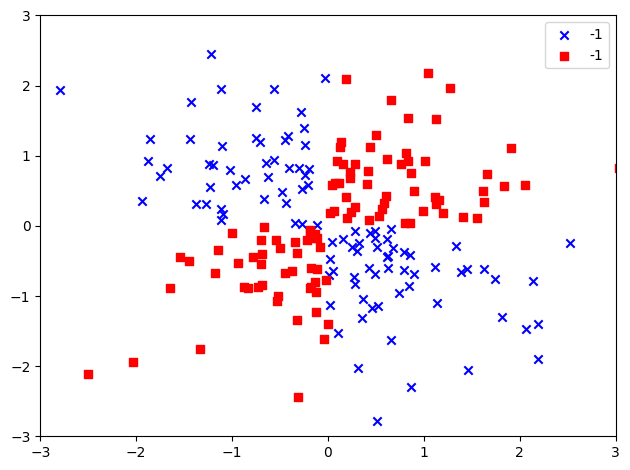

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 간단한 비선형 xor형태의 데이터세트 만들기
# 목표는 이 비 선형 데이터를 분류하는것이다.

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                    X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b',
            marker='x',
            label='-1'
                )

plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1'
                )
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [30]:
from sklearn import datasets
# 사이킷런에 데이터셋에서 붓꽃 데이터셋 가져오기
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('클래쓰 레이블', np.unique(y))

클래쓰 레이블 [0 1 2]


In [31]:
from sklearn.model_selection import train_test_split
# 데이터셋 분할 기능 모듈이다.
# test : train = 3 : 7 비율로 데이터를 랜덤하게 나눈다. 
# random_state=1, 랜덤 시드생성기에 시드넘버로 1을 넣는다.
# stratify=y 계층화 기능을 쓴다. 클래쓰 레이블 비율을 입력 데이터셋과 동일하게 만든다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [42]:
from sklearn.preprocessing import StandardScaler
# 머신러닝 알고리즘의 최적화를 위해서 특성스케일 조정 -> 표준화
# 표준화라면? 1. 데이터의 평균을 0으로 만든다. 2. 데이터의 표준편차를 0~1값으로 만든다.

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
X_combined_std = np.vstack((X_train_std, X_test_std))


In [33]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그리는 부분
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 각 클래스 별로 데이터 점 표시
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx],
                    label=cl, edgecolor='black')

    # 테스트 인덱스가 있을 경우, 테스트 데이터셋 특별 표시
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    edgecolor='black', alpha=1.0, linewidth=1,
                    marker='o', s=100, label='test set')

/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


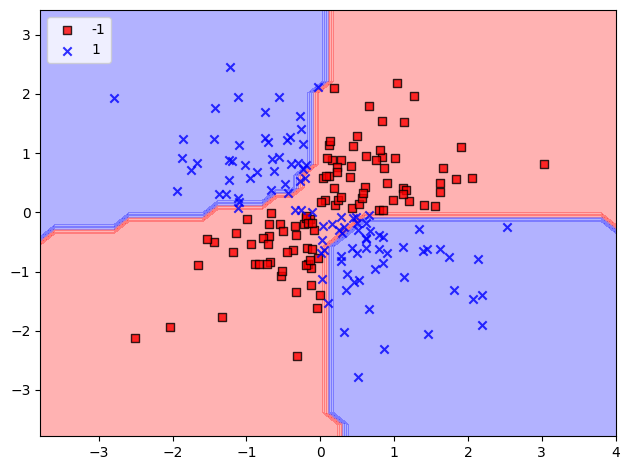

In [34]:
from sklearn.svm import SVC
# 커널 svm 사용법. -> 비선형 데이터의 결정경계 찾기
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0) #gamma(r)는 Gaussian sphere의 크기를 제한하는 매개변수이다. 이 값은 분산과 비례한다. 즉 gamma값이 너무 커지면 과적합이 일어날수있다.
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


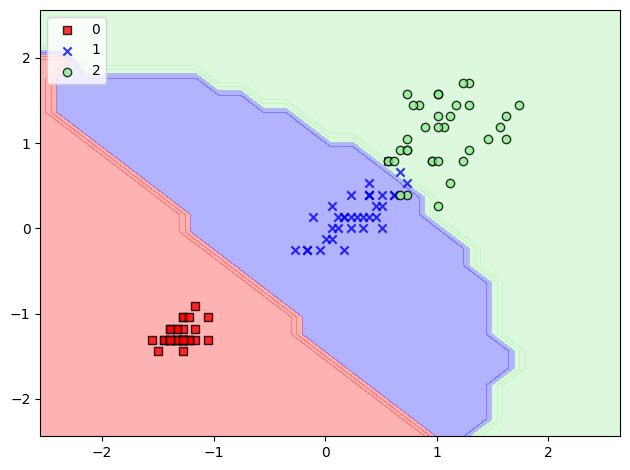

In [35]:
 #gamma 의 값을 작게 설정하면 부드러운 결정경계, 분산을 줄임
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=10.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, classifier=svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


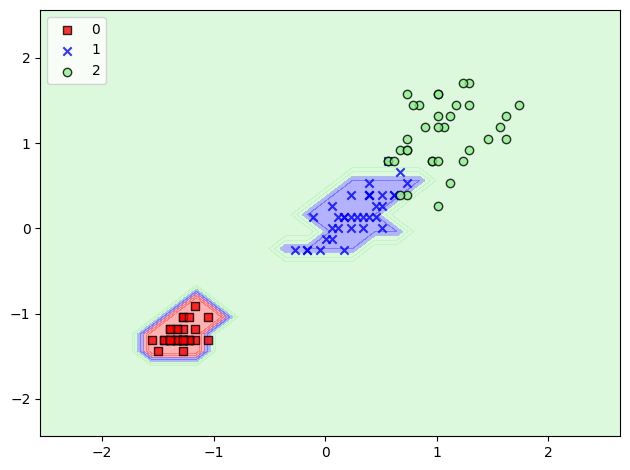

In [36]:
 #gamma 의 값을 크게 설정하면, 구불구불한 모양의 결정경계, 분산을 높임
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=10.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, classifier=svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


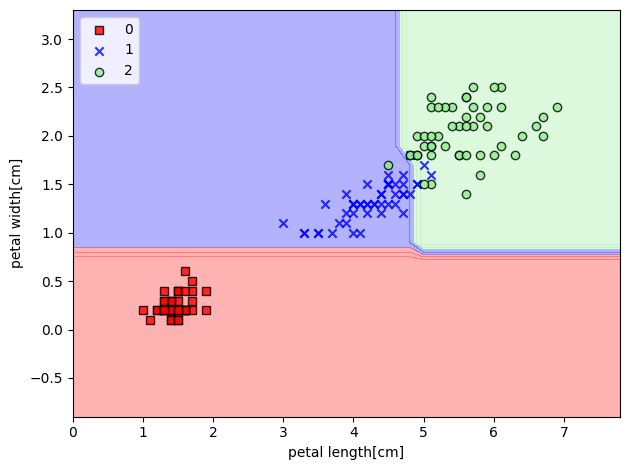

In [37]:
from sklearn.tree import DecisionTreeClassifier
# 사이킷런으로 결정트리 쓰기
tree = DecisionTreeClassifier(criterion='gini', # 정보이득 계산 기준 gini
                              max_depth= 4,     # 결정트리 깊이 4
                              random_state=1)   # 랜덤시드 번호 1
tree.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=tree)
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


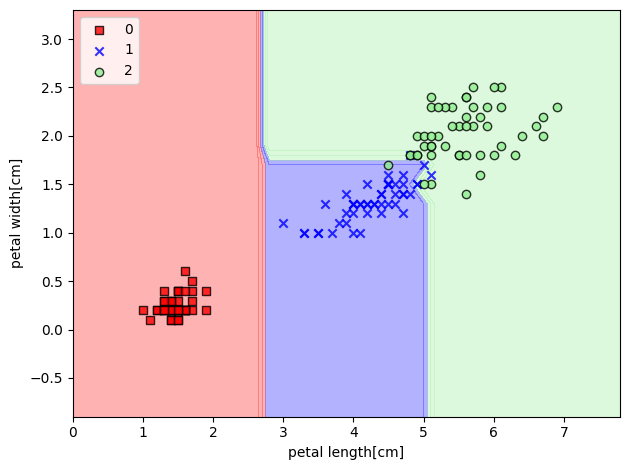

In [38]:
from sklearn.ensemble import RandomForestClassifier
# 랜덤 포레스트 기법을 사이킷런 모델을 통해 사용 -> 데이터 분류
forest = RandomForestClassifier(
    criterion='gini',   # 정보이득 계산 방식 gini
    n_estimators=25,    # 앙상블에서 사용할 결정트리 개수이다. -> 가장 신경써야할 변수이다. 계산비용의 효율성을 따져보고 적절한 숫자를 넣어야한다.
    random_state=1,
    n_jobs=2)           # 훈련과정에서 사용할 cpu코어의 개수이다.
forest.fit(X_train, y_train)

# 실제 훈련데이터셋과, 훈련데이터셋과 테스트셋을 합친 데이터셋에 대해서도 잘 분류하고있다.
plot_decision_regions(
    X_combined,
    y_combined,
    classifier=forest,
)
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

/home/viplab/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


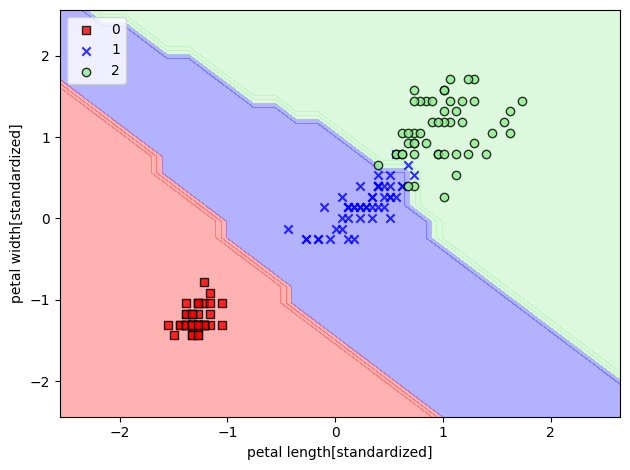

In [46]:
from sklearn.neighbors import KNeighborsClassifier
# 유클리디언 거리 측정 방식을 사용한 사이킷런의 knn활용법
knn = KNeighborsClassifier(
    n_neighbors=5,      # 이웃수. -> 사용자가 이를 조절해서 과소, 과대적합을 잘 조절해야한다.
    p=2,                # p =1 : 맨해튼 거리측정, p =2 : 유클리디언 거리측정
    metric='minkowski'  # 거리측정 함수
)
knn.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=knn,
)
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()